This Jupytor notebook practices the use of SVM for data regression by following the examples found in:

https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

Written by Shing Chi Leung at 23 February 2021

In [ ]:
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import matplotlib.pyplot as plt

# for blobs and circles classification

from sklearn.datasets.samples_generator import make_blobs, make_circles
from mpl_toolkits import mplot3d

# for face recognition

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("gdrive")

Mounted at gdrive


# SVM For Bill Authentication

In this part I will use SVM to classify bills based on their variance, skewness and other stiatistical parameters. 

In [ ]:
file_path = "gdrive/MyDrive/Colab Notebooks/bill_authentication.csv"

df = pd.read_csv(file_path)
print("First 5 lines of data: \n{}\n".format(df.head(5)))
print(df.describe())
print(df.shape)


First 5 lines of data: 
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

          Variance     Skewness     Curtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
(1372, 5)


Create the training and test set and use the training set to train the SVC linear model. 

In [ ]:
x = df.drop("Class", axis=1)
y = df["Class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
svc = SVC(kernel = "linear")
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Then I use the trained model for prediction. 

In [ ]:
y_pred = svc.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[182   2]
 [  1 158]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       184
           1       0.99      0.99      0.99       159

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



The trained model has a very high accuracy thanks to the clean separation of the data. 

# SVM Model for Iris Classification

In this part I will use SVM to classify types of Iris based on their flower properties. 

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
file_path2 = "gdrive/MyDrive/Colab Notebooks/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

#iris data 
df2 = pd.read_csv(file_path2, names=colnames)

print(df2.head(5))

   sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


I prepare the training and test sets and use the training set to train the SVC moel with a polynomial kernel. 

In [ ]:
x = df2.drop("Class",axis=1)
y = df2["Class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
svc2 = SVC(kernel="poly", degree=8)
svc2.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svc2.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0  8  0]
 [ 0  1  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



The model works well for IRis-setosa and Itis-virginica, but it has a lower precision for Iris-versicolor.

Then I use another kernel (Gaussian -- "rbf") for the classification.

In [ ]:
# gaussian kernel

svc3 = SVC(kernel="rbf")
svc3.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svc3.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0  8  0]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



The accuracy is much improved. THis shows that the parameter space of the data points are much closer to Gaussian than polynomials. 

# SVM Practice for Blobs

In this part I use the sklearn dataset to generate blobs for data. Then I wull use SVM to classify these blobs. 

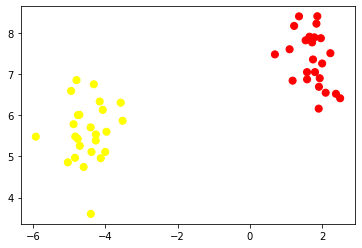

In [ ]:
x, y = make_blobs(n_samples=50, centers=2, cluster_std=0.6)

plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap="autumn")

In [ ]:
model = SVC(kernel="linear", C=1e10)
model.fit(x, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

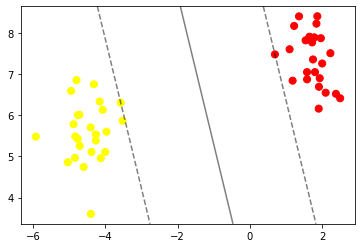

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):

  if ax == None:
    ax = plt.gca()

  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # create grid to evaluate model
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)

  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  # plot decision boundary
  ax.contour(X, Y, P, colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--", "-", "--"])

  # plot support vector
  if plot_support:
    ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=300, linewidth=1, facecolors="none")
  
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap="autumn")
plot_svc_decision_function(model)

The dashed lines are the lines which pass through the supporting vectors. 

In [ ]:
model.support_vectors_

array([[ 0.69463529,  7.48559356],
       [-3.57622565,  6.30964417]])

# Kernel SVM

In this part I will use the sklearn dataset to generate concentric cirlces of data points. 

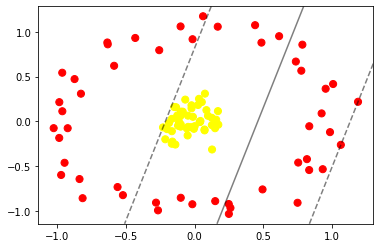

In [ ]:
x, y = make_circles(100, factor=0.1, noise=0.1)

clf = SVC(kernel="linear").fit(x,y)
plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap="autumn")
plot_svc_decision_function(clf, plot_support=False)

Then I will use the Gaussian kernel to "lift" the datapoint so that the two groups of points can be separated. 

(100, 2) (100,)
(100,)


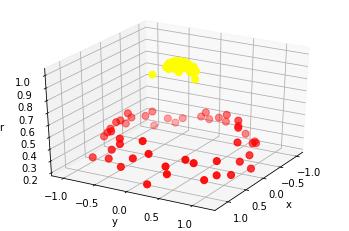

In [ ]:
r = np.exp(-(x**2).sum(1))

def plot_3D(elev=30, azim=30, X=x, y=y):

  print(x.shape, r.shape)
  print(y.shape)

  ax=plt.subplot(projection="3d")
  ax.scatter3D(X[:,0], X[:,1], r, c=y, s=50, cmap="autumn")
  ax.view_init(elev=elev, azim=azim)
  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.set_zlabel("r")

plot_3D(30, 30, x, y)

As we see from the above figure, the red points are now separated from the yellow points by the new dimension. 

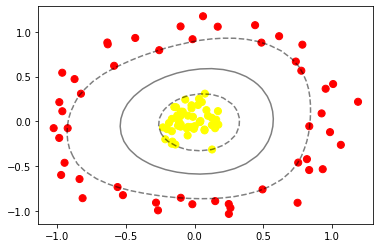

In [ ]:
clf = SVC(kernel="rbf", C=1E6)
clf.fit(x,y)

plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap="autumn")
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=300, lw=1, facecolors="none")

The extra dimension helps the SVC to classify the datasets. 

Then I revisit the blob data again. 

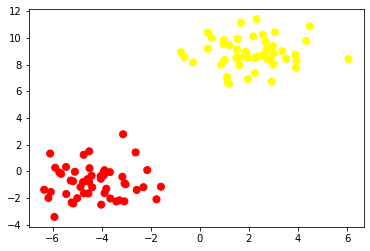

In [ ]:
x, y = make_blobs(n_samples=100, centers=2, cluster_std=1.2)
plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap="autumn")

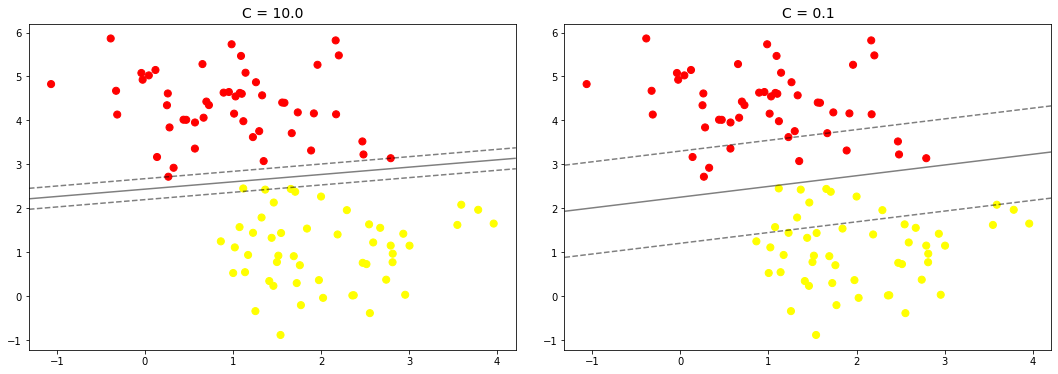

In [ ]:
x, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10, 0.1]):
  model = SVC(kernel="linear", C=C).fit(x, y)
  axi.scatter(x[:,0], x[:,1], c=y, s=50, cmap="autumn")
  plot_svc_decision_function(model, axi)

  axi.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=300, lw=1, facecolors="none")
  axi.set_title("C = {0:.1f}".format(C), size=14)

We can see that the choice of "C" in the SVC determines how relax or tight the classification should be. A larger C results in a tighter constraints.  

# SVC Face Recognition

In this section I will use SVC to classify the faces of different celebrities. 

In [ ]:
faces = fetch_lfw_people(min_faces_per_person=60)

print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let us examine the typical faces in the images. 

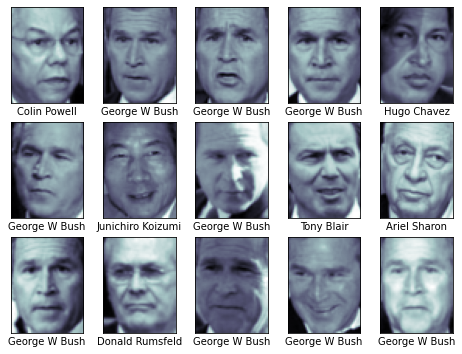

In [ ]:
fig, ax = plt.subplots(3, 5, figsize=(8,6))
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap="bone")
  axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

The classification takes two steps. First, I will use PCA to reduce the dimension of the images. Then based on the dimension-reduced vectors which represent the image, I classify these vectors by SVC. 

In [ ]:
pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel="rbf", class_weight="balanced")
model = make_pipeline(pca, svc)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target)

In [ ]:
param_grid = {"svc__C":[1, 5, 10, 50], "svc__gamma":[0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(x_train, y_train)
print(grid.best_params_)

CPU times: user 1min 14s, sys: 40.9 s, total: 1min 55s
Wall time: 1min 9s
{'svc__C': 10, 'svc__gamma': 0.001}


The best model is C = 10 and \gamma = 0.001. I will further use this setting for prediction. 

In [ ]:
model = grid.best_estimator_
y_pred = model.predict(x_test)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

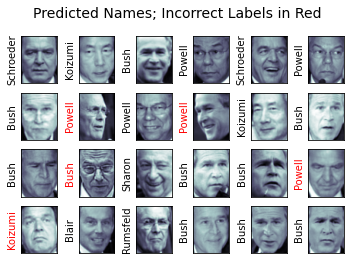

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
  axi.imshow(x_test[i].reshape(62, 47), cmap="bone")
  axi.set(xticks=[], yticks=[])
  axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1], color="black" if y_pred[i] == y_test[i] else "red")
  
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

A significant fraction of faces are correctly identified except for faces of Powell, Bush and Koizumi. 

Then I look at the classification report to see which faces are less accurately classified. 

In [ ]:
print(classification_report(y_test, y_pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.94      0.68      0.79        22
     Colin Powell       0.66      0.80      0.72        50
  Donald Rumsfeld       0.73      0.81      0.77        27
    George W Bush       0.89      0.93      0.91       126
Gerhard Schroeder       0.73      0.79      0.76        28
      Hugo Chavez       0.93      0.58      0.72        24
Junichiro Koizumi       0.86      0.82      0.84        22
       Tony Blair       0.78      0.66      0.71        38

         accuracy                           0.81       337
        macro avg       0.81      0.76      0.78       337
     weighted avg       0.82      0.81      0.81       337



Text(91.68, 0.5, 'predicted label')

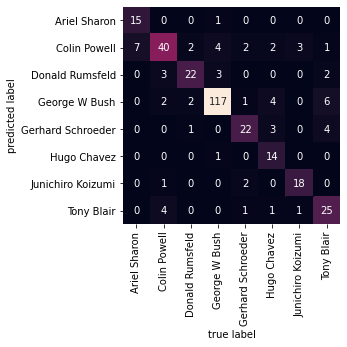

In [ ]:
mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)

plt.xlabel("true label")
plt.ylabel("predicted label")

A larger error is made for Tony Blair;s image. The image has a higher misinterpretation count as George W Bush. 